In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('healthcare_dataset.csv')

In [3]:
# Data preprocessing
# Handle missing values if any
data.dropna(inplace=True)

In [4]:
# Data exploration
print(data.head())  # Display first few rows
print(data.info())  # Get information about the data
print(data.describe())  # Summary statistics

                  Name  Age  Gender Blood Group Type Medical Condition  \
0      Tiffany Ramirez   81  Female               O-          Diabetes   
1          Ruben Burns   35    Male               O+            Asthma   
2            Chad Byrd   61    Male               B-           Obesity   
3    Antonio Frederick   49    Male               B-            Asthma   
4  Mrs. Brandy Flowers   51    Male               O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        11/17/2022  Patrick Parker           Wallace-Hamilton   
1        06-01-2023   Diane Jackson  Burke, Griffin and Cooper   
2        01-09-2019      Paul Baker                 Walton LLC   
3        05-02-2020  Brian Chandler                 Garcia Ltd   
4        07-09-2021  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare     37490.98336          146       Elective   
1   UnitedHealthcare  

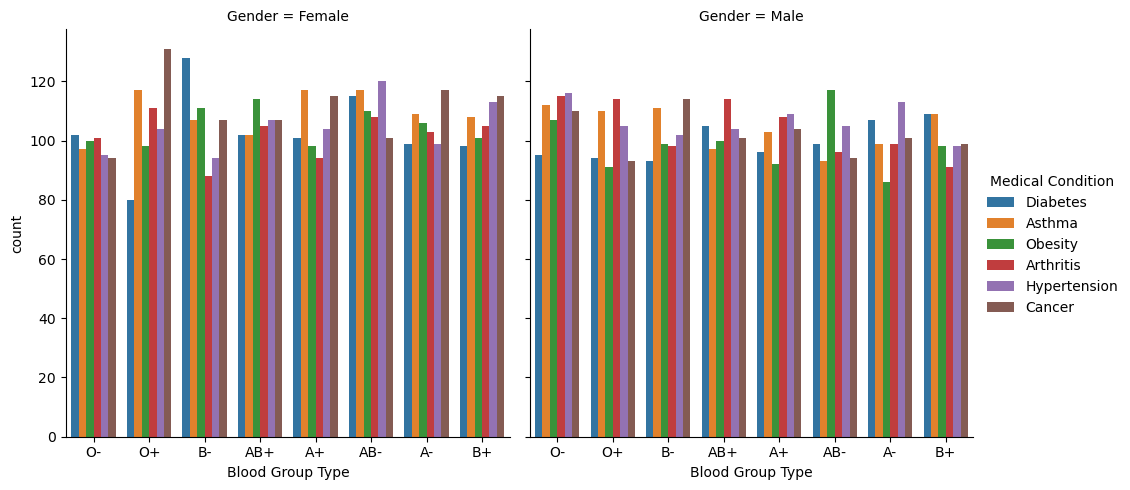

In [5]:
# Visualization
# Plot to visualize relationship between Blood Group Type, Gender, and Medical Condition
sns.catplot(x='Blood Group Type', hue='Medical Condition', col='Gender', data=data, kind='count')
plt.show()

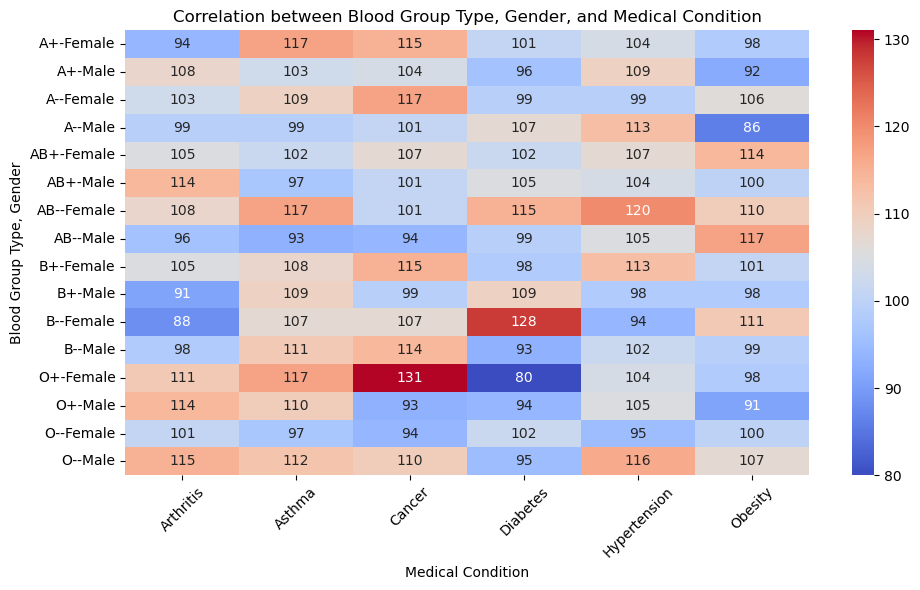

In [7]:
# Create a cross-tabulation (contingency table) between Blood Group Type, Gender, and Medical Condition
cross_tab = pd.crosstab(index=[data['Blood Group Type'], data['Gender']], columns=data['Medical Condition'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Correlation between Blood Group Type, Gender, and Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Blood Group Type, Gender')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

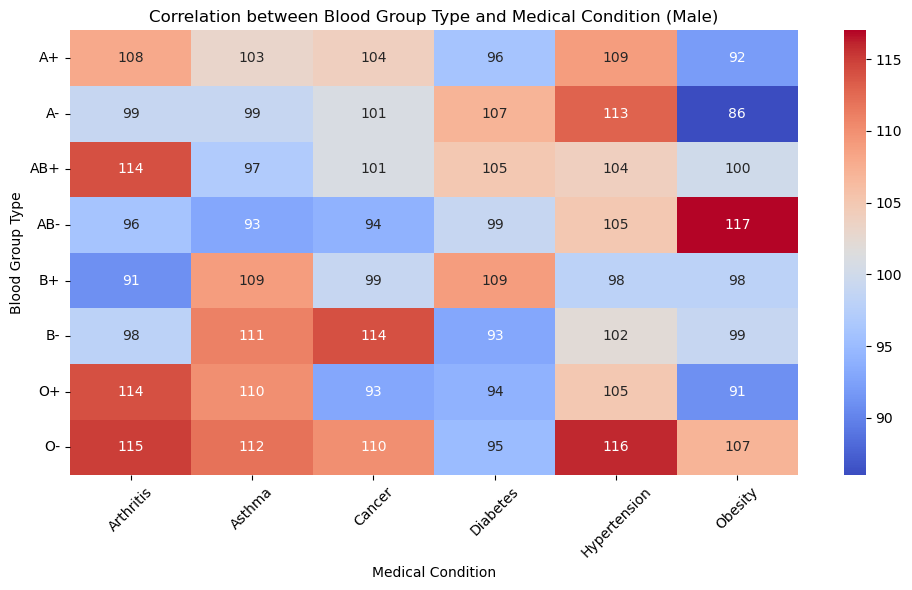

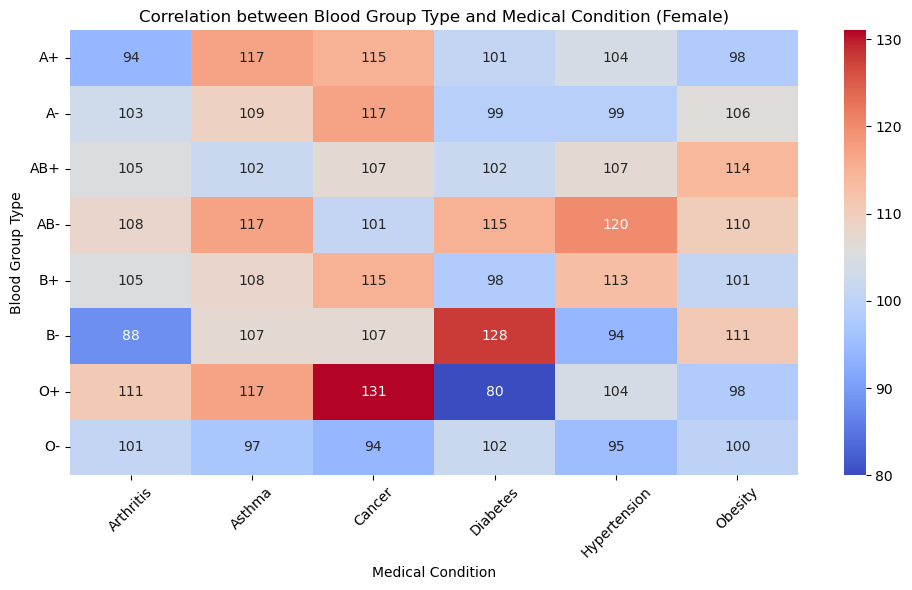

In [9]:
# Different plots for male and female

# Filter data for Male and Female
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Create cross-tabulations for Male and Female separately
cross_tab_male = pd.crosstab(index=[male_data['Blood Group Type']], columns=male_data['Medical Condition'])
cross_tab_female = pd.crosstab(index=[female_data['Blood Group Type']], columns=female_data['Medical Condition'])

# Plot heatmap for Male
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_male, annot=True, cmap='coolwarm', fmt='d')
plt.title('Correlation between Blood Group Type and Medical Condition (Male)')
plt.xlabel('Medical Condition')
plt.ylabel('Blood Group Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot heatmap for Female
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_female, annot=True, cmap='coolwarm', fmt='d')
plt.title('Correlation between Blood Group Type and Medical Condition (Female)')
plt.xlabel('Medical Condition')
plt.ylabel('Blood Group Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
# Analysis
# Analyze the plots to determine any correlation

# Average Billing Amount for each Medical Condition
# Calculate average billing amount for each medical condition
avg_billing_amount = data.groupby('Medical Condition')['Billing Amount'].mean()

# Display the result
print(avg_billing_amount)

Medical Condition
Arthritis       25187.631255
Asthma          25416.869895
Cancer          25539.096133
Diabetes        26060.116129
Hypertension    25198.033973
Obesity         25720.842683
Name: Billing Amount, dtype: float64
